# Projet 2 : Participez à un concours sur la Smart City
<font color="grey"><i> Chargement des modules necessaires </i></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## I) Présentation générale

### I.1) Chargement du jeu de données

In [2]:
data = pd.read_csv('data/p2-arbres-fr.csv', sep = ';')

<font color="grey"><i> Apercu des permières lignes et colonnes </i></font>

In [3]:
df=data.copy()
df.head().style.set_caption("Aperçu des permières lignes et colonnes")


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,nan,nan,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,nan,20,5,nan,0.000000,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,nan,nan,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,nan,65,8,A,nan,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,nan,nan,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,nan,90,10,A,nan,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,nan,nan,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,nan,60,8,A,nan,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,nan,nan,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,nan,38,0,nan,nan,48.890435,2.315289


### I.2) Taille du jeu de données

In [4]:
print("Le jeu de données est composé de",df.shape[1],"colonnes ou attributs et ",df.shape[0]," lignes",)

Le jeu de données est composé de 18 colonnes ou attributs et  200137  lignes


### I.3) Nom et types des colonnes

In [5]:
pd.DataFrame({'column':df.dtypes.index,'min':df.dtypes.values}).style.set_caption("Nom et types des colonnes")

,column,min
0,id,int64
1,type_emplacement,object
2,domanialite,object
3,arrondissement,object
4,complement_addresse,object
5,numero,float64
6,lieu,object
7,id_emplacement,object
8,libelle_francais,object
9,genre,object


In [6]:
pd.DataFrame({'colonne':df.dtypes.value_counts().index,'nombre':df.dtypes.value_counts().values}).style.set_caption("nombre de variable de chaque type")

,colonne,nombre
0,object,11
1,float64,4
2,int64,3


Text(0.5, 1.0, 'Répartition des types de variable')

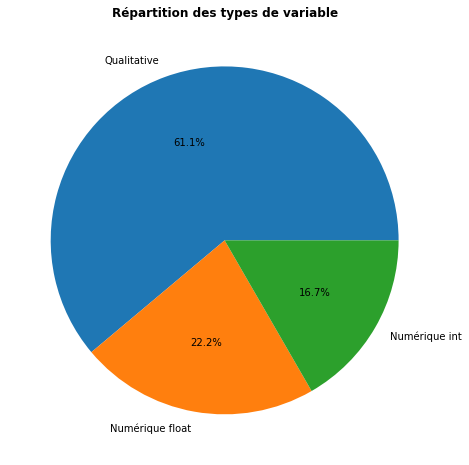

In [7]:
plt.figure(figsize=(8,8))
df.dtypes.value_counts().plot.pie(labels=['Qualitative','Numérique float','Numérique int'],autopct='%1.1f%%')
plt.ylabel('')
plt.title("Répartition des types de variable",fontweight='bold')

### I.4) Valeurs manquantes

In [8]:
pd.DataFrame({'colonne':df.isnull().sum().index,'effectif manquant':df.isnull().sum().values}).style.set_caption("Valeurs manquantes")

,colonne,effectif manquant
0,id,0
1,type_emplacement,0
2,domanialite,1
3,arrondissement,0
4,complement_addresse,169235
5,numero,200137
6,lieu,0
7,id_emplacement,0
8,libelle_francais,1497
9,genre,16


In [9]:
pd.DataFrame({'colonne':(data.isna().sum(axis = 0)/data.shape[0]).sort_values(ascending=False).index,'effectif manquant %':((data.isna().sum(axis = 0)/data.shape[0])*100).sort_values(ascending=False).values}).style.set_caption("Valeurs manquantes")


,colonne,effectif manquant %
0,numero,100.000000
1,complement_addresse,84.559577
2,variete,81.624088
3,stade_developpement,33.579498
4,remarquable,31.527404
5,espece,0.875400
6,libelle_francais,0.747988
7,genre,0.007995
8,domanialite,0.000500
9,circonference_cm,0.000000


<font color="grey"><i> Représentation graphique des valeurs manquantes </i></font>


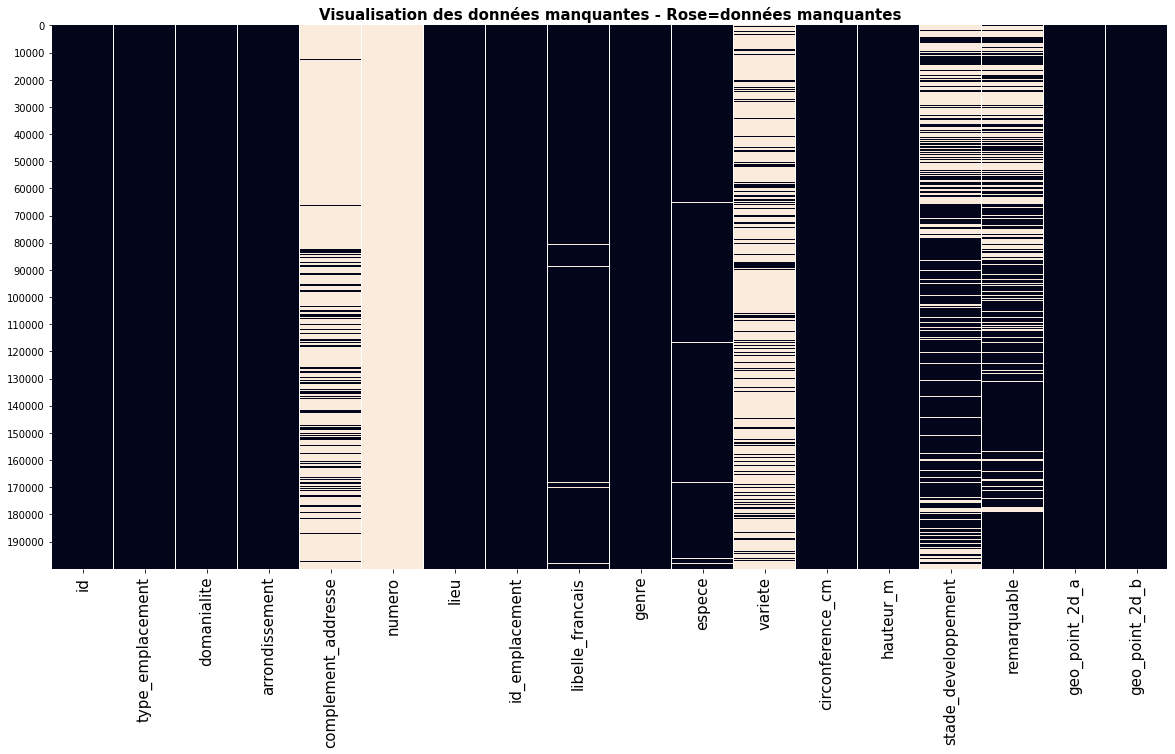

In [10]:
plt.figure(figsize=(20,10))
plt.title("Visualisation des données manquantes - Rose=données manquantes",fontweight='bold',fontsize=15)
sns.heatmap(data.isna(), cbar=False)
plt.xticks(fontsize='15')
plt.yticks(np.arange(0,200000,10000),np.arange(0,200000,10000),fontsize='10')
plt.show()

### I.5) Premières observations

- Les variables "circonference_cm","hauteur_m", "id","geo_point_2d_a","id_emplacement ","lieu","geo_point_2d_b","arrondissement","type_emplacement", ne comporte aucune valeurs manquantes
- La variables "numéro" comporte aucune valeur celle-ci s'avere inutile pour la suite de l'analyse
- Les variables "complement_addresse" et "variete" ont un pourcentage de valeurs manquantes supérieur à 80%
- Les variables “stade_developpement” et “remarquable” ont un pourcentage de valeurs manquantes d'environ 30%


## II) Analyse de données

##  II.1 Nettoyage du jeu de donnée

### II.1.1) Supression de variable sans interêt

In [11]:
df = df.drop(columns=['numero','variete','complement_addresse'])
print("Le jeu de données est maintenant composé de",df.shape[1],"colonnes ou attributs et ",df.shape[0]," lignes",)

Le jeu de données est maintenant composé de 15 colonnes ou attributs et  200137  lignes


### II.1.2) Recherche et traitement des doublons

In [12]:
dict = {}
for col in df.columns:
    dict[col] =  len(df[col].unique())

pd.DataFrame({'column':df.columns,'Count':dict.values()}).style.set_caption("Nombres de valeurs unique")

,column,Count
0,id,200137
1,type_emplacement,1
2,domanialite,10
3,arrondissement,25
4,lieu,6921
5,id_emplacement,69040
6,libelle_francais,193
7,genre,176
8,espece,540
9,circonference_cm,531


In [13]:

print(df.duplicated(df.columns[1:]).value_counts())
print("Nous remarquons qu'il il ya autant d'id que d'abre et qu'auncun d'entre eux ne partagent les mêmes valeurs.Donc il n'y a pas de doublon")

False    200137
dtype: int64
Nous remarquons qu'il il ya autant d'id que d'abre et qu'auncun d'entre eux ne partagent les mêmes valeurs.Donc il n'y a pas de doublon


### II.2.1) Statistiques
<font color="grey"><i> Statistiques basiques des variables quantitatives.
la methode describe ne prend pas en compte les valeurs manquantes. </i></font>

In [14]:
df.describe().style.set_caption("statistiques basiques des variables quantitatives")

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,387202.682308,83.380479,13.110509,0.001343,48.854491,2.348208
std,545603.242357,673.190213,1971.217387,0.036618,0.030234,0.051220
min,99874.000000,0.000000,0.000000,0.000000,48.742290,2.210241
25%,155927.000000,30.000000,5.000000,0.000000,48.835021,2.307530
50%,221078.000000,70.000000,8.000000,0.000000,48.854162,2.351095
75%,274102.000000,115.000000,12.000000,0.000000,48.876447,2.386838
max,2024745.000000,250255.000000,881818.000000,1.000000,48.911485,2.469759


- Nous remarquons que la variable id correspond à l'identifiant de chaque arbre, par consequant ses statistiques n'ont alors aucun sens.
- Nous pouvons déduire que les arbres de Paris mesurent en moyenne 13m et ont une circonférence moyenne de 83cm. Cependant, les valeurs maximales pour "circonference_cm" et "hauteur_m" semblent abérantes,il faut identifier et traiter les outliers avant d'interpréter les statistiques.
- Les variables "geo_point_2d_a" et "geo_point_2d_b" correspondent aux coordonnées de chaque arbres

### II.2.2) Outliers hauteur et circonference
<font color="grey"><i> Recherche des outliers grace a l'interquartile</i></font>

## IQR = Q3 - Q1
## max_outlier = q3 + 1.5 * iqr

In [15]:
iqrHauteur =  np.percentile(df['hauteur_m'].sort_values(ascending=True), 75) - np.percentile(df['hauteur_m'].sort_values(ascending=True), 25)
q3Hauteur = np.percentile(df['hauteur_m'], 75)
iqrCirconf =  np.percentile(df['circonference_cm'].sort_values(ascending=True), 75) - np.percentile(df['circonference_cm'].sort_values(ascending=True), 25)
q3Circonf = np.percentile(df['circonference_cm'], 75)

maxOutlierHauteur = iqrHauteur * 1.5 + q3Hauteur
maxOutlierCirconf = iqrCirconf * 1.5 + q3Circonf

print(' \n Toute hauteurs dépassant ', maxOutlierHauteur , ' sont considéré comme abérante')
print(' \n Toute circonference dépassant ', maxOutlierCirconf , ' sont considéré comme abérante')


 
 Toute hauteurs dépassant  22.5  sont considéré comme abérante
 
 Toute circonference dépassant  242.5  sont considéré comme abérante


### II.2.3 Représentation graphique et quantiles

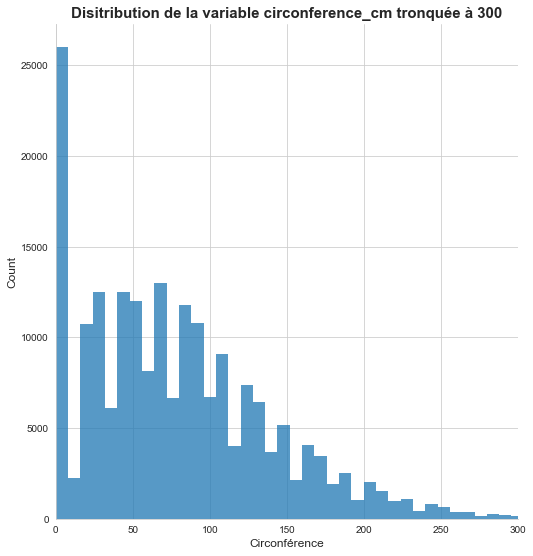

In [16]:
sns.set_style("whitegrid")
g=sns.displot(df["circonference_cm"],binwidth=8)
plt.title('Disitribution de la variable circonference_cm tronquée à 300',fontsize=15,fontweight='bold')
plt.xlabel('Circonférence',fontsize=12)
plt.ylabel('Count',fontsize=12)
g.fig.set_size_inches(8,8)
plt.xlim(0,300)
plt.show()

[(0.0, 40.0)]

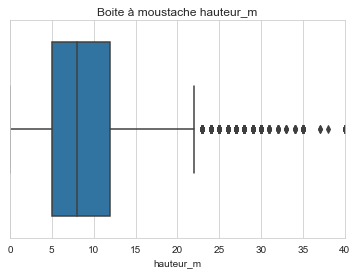

In [17]:
sns.set_style("whitegrid")
plt.title('Boite à moustache hauteur_m')
ax = sns.boxplot(x= df["hauteur_m"].sort_values(ascending=True))
ax.set(xlim=(0, 40))

In [18]:
quantile_h = df["hauteur_m"].quantile(q=np.linspace(0,1,11))
pd.DataFrame({'Pourcentage':quantile_h.index,'Quantile':quantile_h.values}).style.set_caption("Quantiles hauteur")

,Pourcentage,Quantile
0,0.000000,0.000000
1,0.100000,0.000000
2,0.200000,2.000000
3,0.300000,5.000000
4,0.400000,6.000000
5,0.500000,8.000000
6,0.600000,10.000000
7,0.700000,11.000000
8,0.800000,14.000000
9,0.900000,16.000000


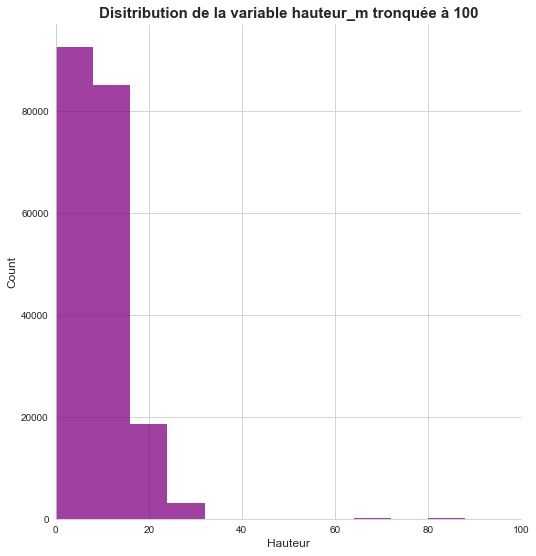

In [19]:
sns.set_style("whitegrid")
g=sns.displot(df["hauteur_m"],binwidth=8, color="purple")
plt.title('Disitribution de la variable hauteur_m tronquée à 100',fontsize=15,fontweight='bold')
plt.xlabel('Hauteur',fontsize=12)
plt.ylabel('Count',fontsize=12)
g.fig.set_size_inches(8,8)
plt.xlim(0,100)
plt.show()

[(0.0, 250.0)]

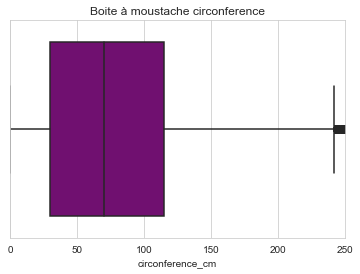

In [20]:
sns.set_style("whitegrid")
plt.title('Boite à moustache circonference')
ax =sns.boxplot(x= df["circonference_cm"].sort_values(ascending=True),color="purple")
ax.set(xlim=(0, 250))

In [21]:
quantile_c = df["circonference_cm"].quantile(q=np.linspace(0,1,11))
pd.DataFrame({'Pourcentage':quantile_c.index,'Quantile':quantile_c.values}).style.set_caption("Quantiles circonference")

,Pourcentage,Quantile
0,0.000000,0.000000
1,0.100000,0.000000
2,0.200000,25.000000
3,0.300000,40.000000
4,0.400000,55.000000
5,0.500000,70.000000
6,0.600000,85.000000
7,0.700000,105.000000
8,0.800000,130.000000
9,0.900000,165.000000


### II.2.4 Variable de  arrondissement

### II.2.4 Variable de géolocalisation


Text(0.5, 1.0, 'Graphique des cordonnées des arbres de Paris')

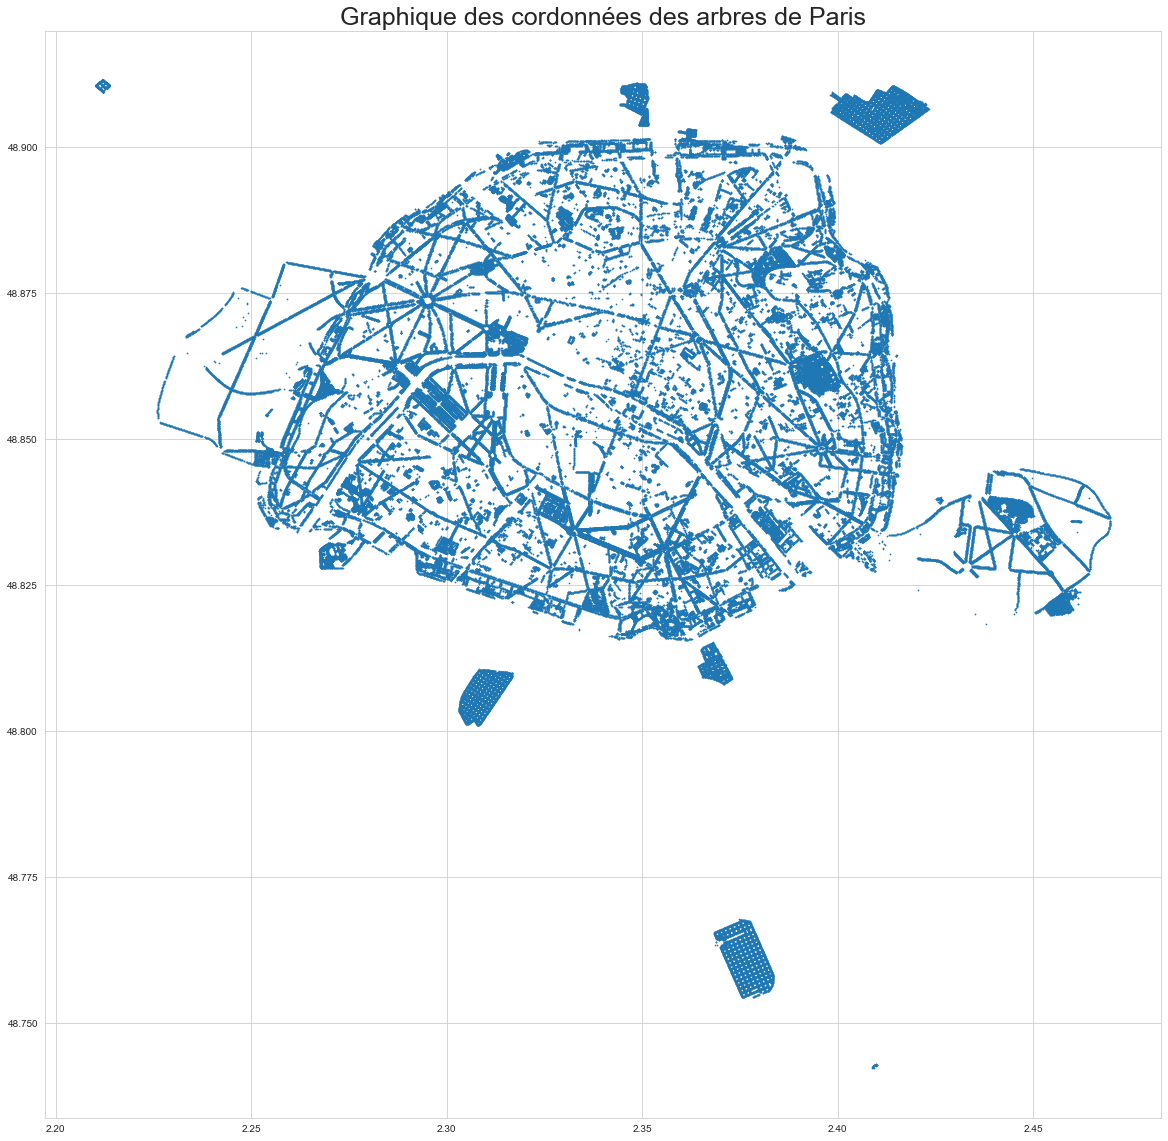

In [22]:
plt.figure(figsize=(20,20))
plt.scatter(df['geo_point_2d_b'],df['geo_point_2d_a'],s=0.5)
#plt.scatter(df_remarquable['geo_point_2d_b'],df_remarquable['geo_point_2d_a'],s=50)
plt.title('Graphique des cordonnées des arbres de Paris',fontsize='25')

In [23]:
dict = {}
for col in df.columns:
    dict[col] =  len(df[col].unique())


df_null=df[(df['circonference_cm']==0) & (df['hauteur_m']==0)]
pd.DataFrame({'Count':df_null['domanialite'].value_counts()}).style.set_caption("Arbre par domanialité")



,Count
CIMETIERE,14359
Jardin,7944
Alignement,3158
PERIPHERIQUE,20
DFPE,15
DASCO,5


### II.2.5 Repartition des arbres en fonction de leurs stade

In [24]:
df_jeune_arbre = df[df['stade_developpement']=='J']
df_jeune_adulte = df[df['stade_developpement']=='JA']
df_adulte = df[df['stade_developpement']=='A']
df_mature = df[df['stade_developpement']=='M']

200137
200137


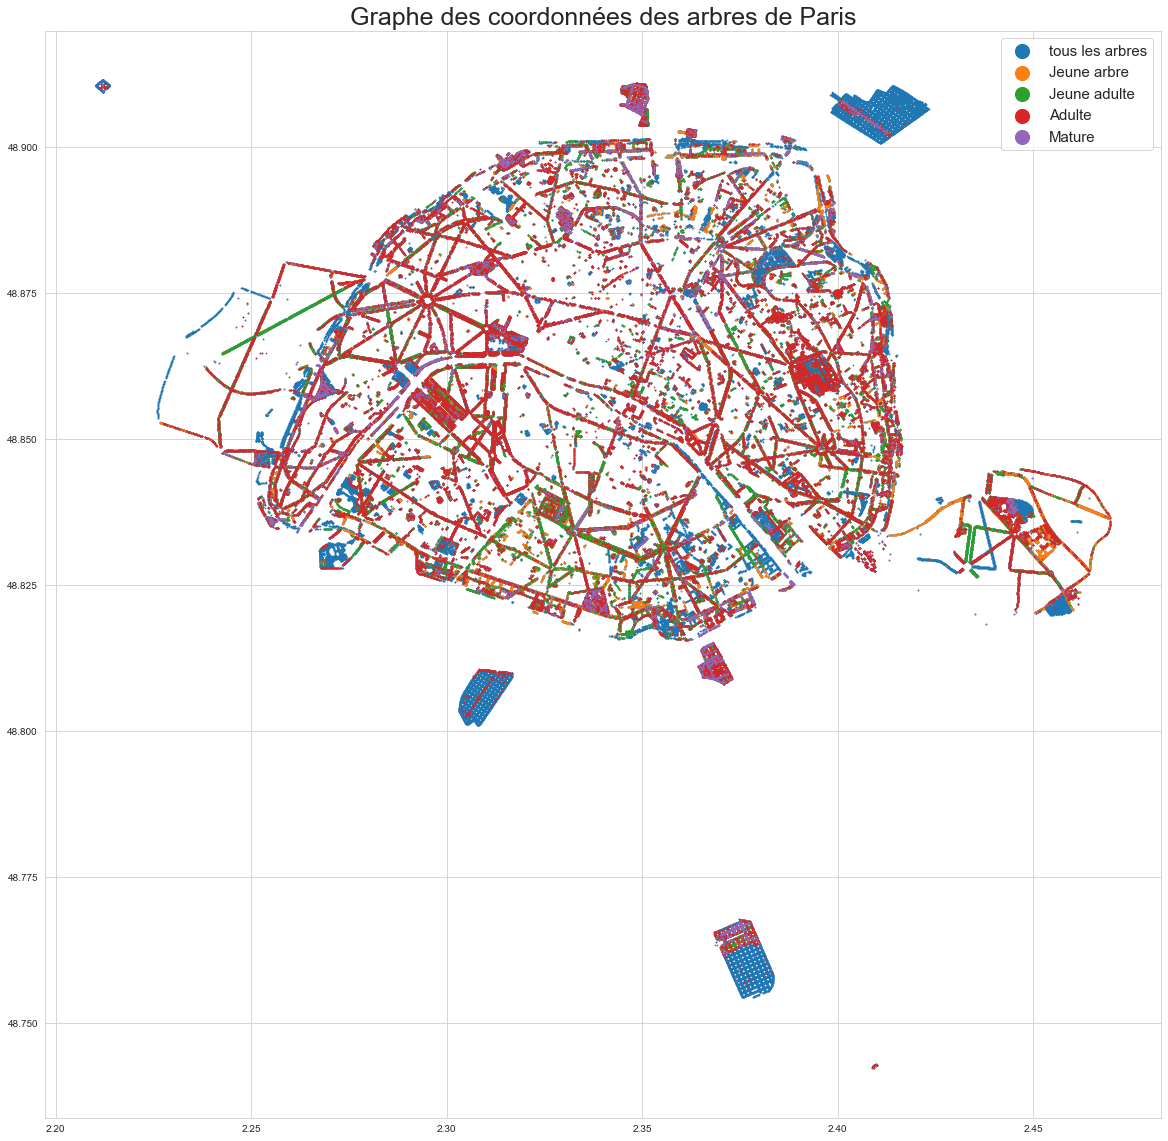

In [25]:
print(df['geo_point_2d_b'].count())
print(df['geo_point_2d_a'].count())
plt.figure(figsize=(20,20))
plt.scatter(df['geo_point_2d_b'],df['geo_point_2d_a'],s=0.5,label='tous les arbres')
plt.scatter(df_jeune_arbre['geo_point_2d_b'],df_jeune_arbre['geo_point_2d_a'],s=0.5,label='Jeune arbre')
plt.scatter(df_jeune_adulte['geo_point_2d_b'],df_jeune_adulte['geo_point_2d_a'],s=0.5,label='Jeune adulte')
plt.scatter(df_adulte['geo_point_2d_b'],df_adulte['geo_point_2d_a'],s=0.5,label='Adulte')
plt.scatter(df_mature['geo_point_2d_b'],df_mature['geo_point_2d_a'],s=0.5,label='Mature')
plt.title('Graphe des coordonnées des arbres de Paris',fontsize='25')
plt.legend(fontsize='15',markerscale=20)

### II.2.5 Variable "remarquable"

In [26]:
df["remarquable"].unique()

array([ 0., nan,  1.])

La variable "remarquable" n'est donc pas une variable quantitative mais qualitative, qui vaut 1 lorsque l'arbre est remarquable, sinon 0

In [27]:
df_remarquable = df[df["remarquable"]==1]
df_remarquable.describe()

,id,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,1.840000e+02,184.000000,184.000000,184.0,184.000000,184.000000
mean,6.477068e+05,303.342391,21.282609,1.0,48.856968,2.332303
std,8.315394e+05,213.145906,24.064497,0.0,0.019162,0.060186
min,1.008180e+05,30.000000,3.000000,1.0,48.818389,2.233706
25%,1.147555e+05,177.250000,14.000000,1.0,48.843187,2.287354
50%,1.354060e+05,265.000000,20.000000,1.0,48.858966,2.336032
75%,2.002348e+06,395.500000,26.000000,1.0,48.869695,2.383782
max,2.017817e+06,2439.000000,327.000000,1.0,48.894623,2.464226


On constate que la moyenne de la circonference et de la hauteur des arbres remarquables, (288,19) , sont nettement plus élevées que celle du dataset complet (80,8)

#Arbre par domanialité

pd.DataFrame({'Count':df['domanialite'].value_counts()}).style.set_caption("Arbre par domanialite")

In [28]:
freq = df_remarquable.groupby(['remarquable','stade_developpement']).size().reset_index(name='count')
freq

,remarquable,stade_developpement,count
0,1.0,A,54
1,1.0,J,1
2,1.0,JA,1
3,1.0,M,126


In [29]:

freq = df_remarquable.groupby(['remarquable','arrondissement']).size().reset_index(name='count')
freq

,remarquable,arrondissement,count
0,1.0,PARIS 10E ARRDT,1
1,1.0,PARIS 11E ARRDT,1
2,1.0,PARIS 12E ARRDT,27
3,1.0,PARIS 13E ARRDT,4
4,1.0,PARIS 14E ARRDT,10
5,1.0,PARIS 15E ARRDT,7
6,1.0,PARIS 16E ARRDT,53
7,1.0,PARIS 17E ARRDT,8
8,1.0,PARIS 18E ARRDT,10
9,1.0,PARIS 19E ARRDT,10


Text(0.5, 1.0, 'Répartition des arbres remarquable')

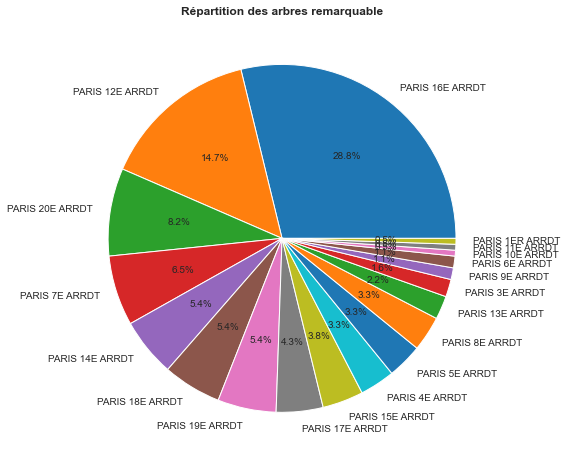

In [30]:
plt.figure(figsize=(8,8))
df_remarquable['arrondissement'].value_counts().plot.pie(labels=['PARIS 16E ARRDT','PARIS 12E ARRDT','PARIS 20E ARRDT',
                                                              'PARIS 7E ARRDT','PARIS 14E ARRDT','PARIS 18E ARRDT',
                                                              'PARIS 19E ARRDT','PARIS 17E ARRDT','PARIS 15E ARRDT',
                                                              'PARIS 4E ARRDT','PARIS 5E ARRDT','PARIS 8E ARRDT',
                                                              'PARIS 13E ARRDT','PARIS 3E ARRDT','PARIS 9E ARRDT',
                                                              'PARIS 6E ARRDT','PARIS 10E ARRDT','PARIS 11E ARRDT','PARIS 1ER ARRDT'
                                                                 ],autopct='%1.1f%%')
plt.ylabel('')
plt.title("Répartition des arbres remarquable",fontweight='bold')

Affichons les arbres qui sont remarquable

In [31]:
print(df['remarquable'].unique())

df_remarquable = df[df['remarquable'] == 1]

[ 0. nan  1.]


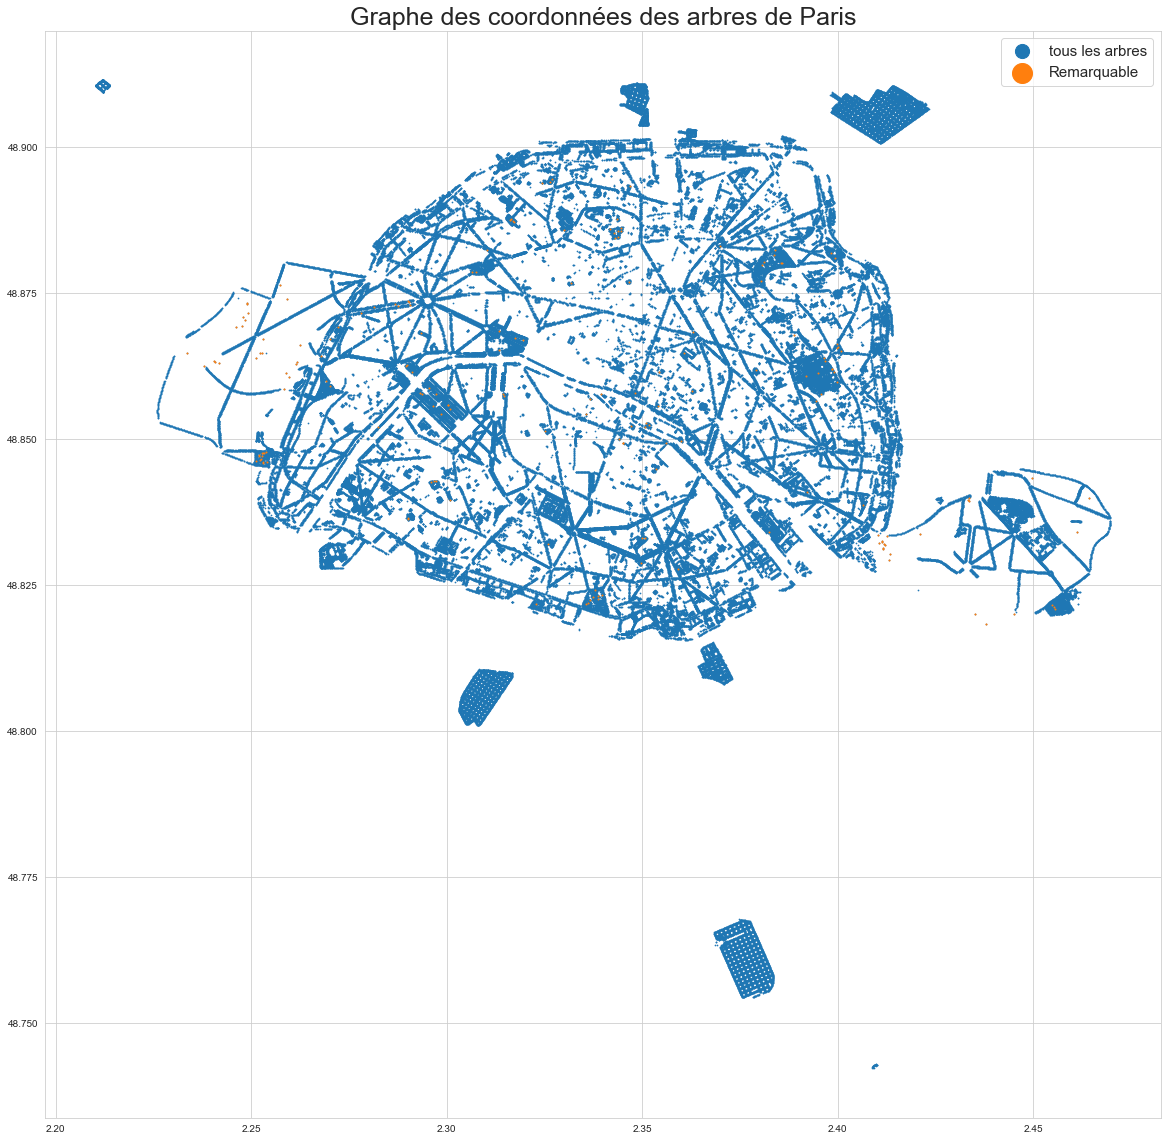

In [32]:
plt.figure(figsize=(20,20))
plt.scatter(df['geo_point_2d_b'],df['geo_point_2d_a'],s=0.5,label='tous les arbres')
plt.scatter(df_remarquable['geo_point_2d_b'],df_remarquable['geo_point_2d_a'],s=1,label='Remarquable')
plt.title('Graphe des coordonnées des arbres de Paris',fontsize='25')
plt.legend(fontsize='15',markerscale=20)

On constate que la moyenne de la circonference remarquable est de 288cm et la hauteur 19m remarquable , sont nettement plus élevées que celle du dataset complet (80,8)

### II.2.6  Variable "stade_developpement"

Nous n'avons pas d'indication sur la signification des abbrévations utilisées pour les valeurs de cette variable.Celle-ci est très importante car les arbes ont des besoins différents selon leur stade de developpement

Comparons les moyennes des circonférences et hauteurs de chaque stade de developpement

In [33]:
df[['circonference_cm','hauteur_m','stade_developpement']].pivot_table(index='stade_developpement')

,circonference_cm,hauteur_m
stade_developpement,,
A,132.762361,13.330364
J,39.419720,38.605932
JA,70.976611,9.986937
M,219.526092,19.239653


On peut supposer:
- J=Jeune arbre
- JA=Jeune Adulte
- A=Adulte
- M=Mature


In [34]:
## 4.2 Imputation sur le stade de developpement des arbres

In [35]:
df['stade_developpement'].value_counts()
print(type(df['stade_developpement'].value_counts()))
pd.DataFrame({'Count':df['stade_developpement'].value_counts()}).style.set_caption("arbre par stade de developpement")

<class 'pandas.core.series.Series'>


,Count
A,64438
JA,35444
J,26937
M,6113


Text(0.5, 1.0, 'Répartition des stade de dev')

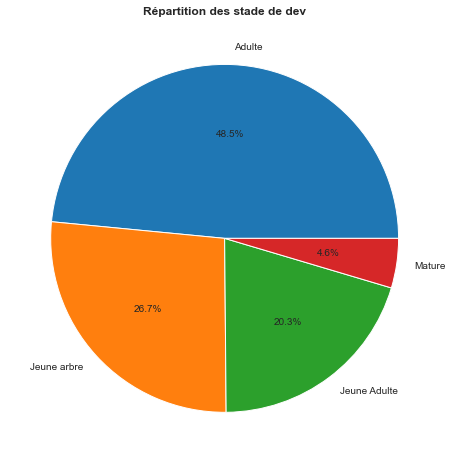

In [36]:
plt.figure(figsize=(8,8))
df['stade_developpement'].value_counts().plot.pie(labels=['Adulte','Jeune arbre','Jeune Adulte','Mature'],autopct='%1.1f%%')
plt.ylabel('')
plt.title("Répartition des stade de dev",fontweight='bold')

In [37]:
df_no_dev=df[df['stade_developpement'].isna()]
df_no_dev.shape



(67205, 15)

### II.2.7  Variable "domanialite"


Text(0.5, 1.0, 'Répartition de domanialité')

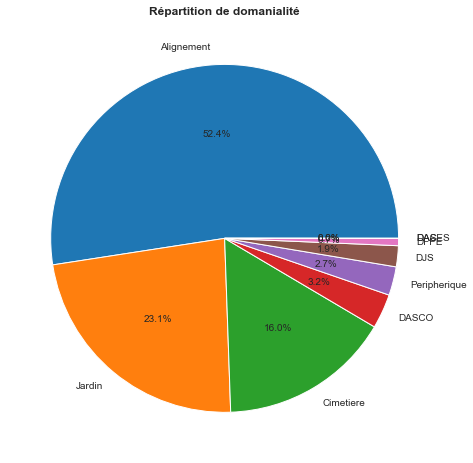

In [38]:

plt.figure(figsize=(8,8))
df['domanialite'].value_counts().plot.pie(labels=['Alignement','Jardin','Cimetiere','DASCO','Peripherique','DJS','DFPE','DAC','DASES'],autopct='%1.1f%%')
plt.ylabel('')
plt.title("Répartition de domanialité",fontweight='bold')

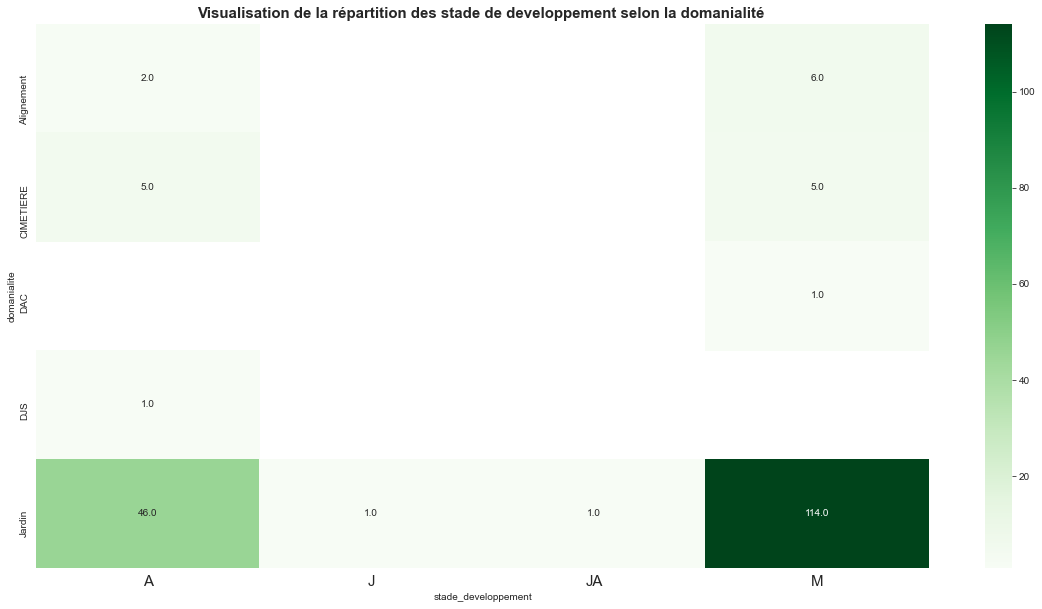

In [39]:
freq = df_remarquable.groupby(['domanialite','stade_developpement']).size().reset_index(name='count')

df_freq = freq.pivot("domanialite","stade_developpement","count")


plt.figure(figsize=(20,10))
plt.title("Visualisation de la répartition des stade de developpement selon la domanialité ",fontweight='bold',fontsize=15)
ax = sns.heatmap(df_freq ,
                 vmin = freq['count'].min() ,
                 vmax = freq['count'].max(),
                 cmap="Greens",
                 annot=True,
                 fmt=".1f")
plt.xticks(fontsize='15')
plt.show()








### II.2.8  Variable "arrondissement"


In [43]:

pd.DataFrame({'Count':df['arrondissement'].value_counts()}).style.set_caption("Arbre par Arrondissement")
freq = df.groupby(['arrondissement','stade_developpement']).size().reset_index(name='count')


In [ ]:
#arbre par arrondisement
freq_max = df.groupby(['arrondissement','stade_developpement']).size().reset_index(name='count')
freq_max = freq_max.groupby('arrondissement').max()

freq_max = freq_max.reset_index()
print(freq_max)

In [ ]:
pd.DataFrame(freq).style.set_caption("Arbre par arrondissement")
pd_freq = pd.DataFrame(freq).style.set_caption("Arbre par arrondissement")
pd_freq

In [46]:



df_freq_max = freq_max.pivot("arrondissement","stade_developpement","count")


In [ ]:
plt.figure(figsize=(20,10))
plt.title(" Répartition des stades de developpement majoritaire dans chaque arrondissement ",fontweight='bold',fontsize=15)
ax = sns.heatmap(df_freq_max , vmin = freq_max['count'].min() ,
                 vmax = freq_max['count'].max(),
                 cmap="Greens",
                 annot=True,
                 fmt=".1f")
plt.xticks(fontsize='15')
plt.show()

In [48]:

df_freq = freq.pivot("arrondissement","stade_developpement","count")


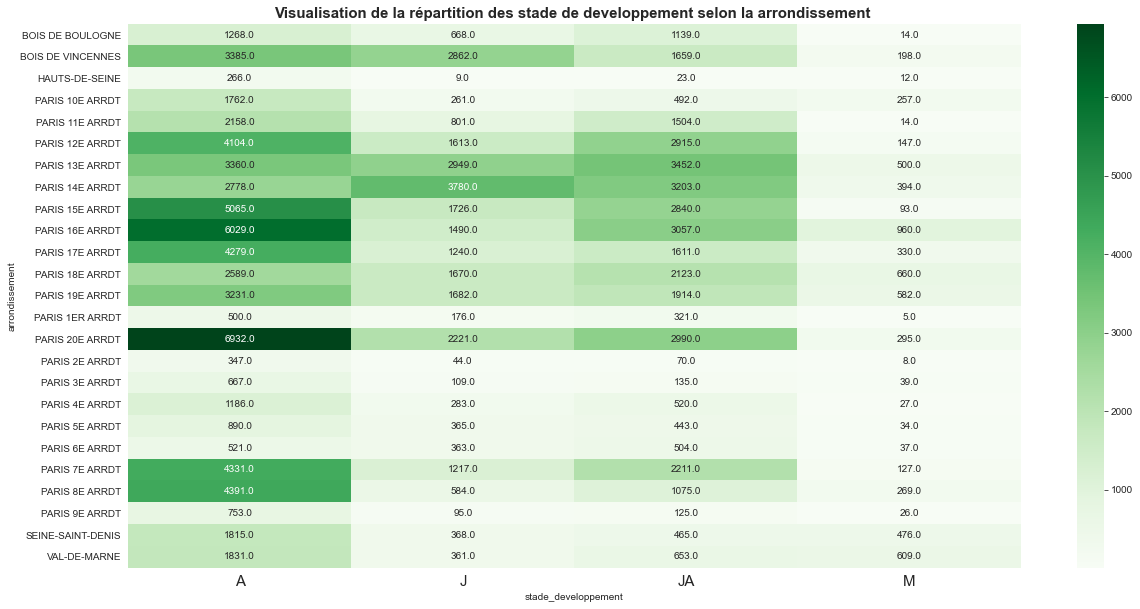

In [49]:
plt.figure(figsize=(20,10))
plt.title("Visualisation de la répartition des stade de developpement selon la arrondissement ",fontweight='bold',fontsize=15)
ax = sns.heatmap(df_freq ,
                 vmin = freq['count'].min() ,
                 vmax = freq['count'].max(),
                 cmap="Greens",
                 annot=True,
                 fmt=".1f")
plt.xticks(fontsize='15')
plt.show()

In [50]:
#arbre par arrondissement
freq_arr = df.groupby(['arrondissement','stade_developpement']).size().reset_index(name='count')
print("freq", freq_arr)

freq        arrondissement stade_developpement  count
0    BOIS DE BOULOGNE                   A   1268
1    BOIS DE BOULOGNE                   J    668
2    BOIS DE BOULOGNE                  JA   1139
3    BOIS DE BOULOGNE                   M     14
4   BOIS DE VINCENNES                   A   3385
..                ...                 ...    ...
95  SEINE-SAINT-DENIS                   M    476
96       VAL-DE-MARNE                   A   1831
97       VAL-DE-MARNE                   J    361
98       VAL-DE-MARNE                  JA    653
99       VAL-DE-MARNE                   M    609

[100 rows x 3 columns]


In [51]:
pd.DataFrame(freq_arr).style.set_caption("Arbre par arrondissement")
pd_freq = pd.DataFrame(freq_arr).style.set_caption("Arbre par arrondissement")
pd_freq

,arrondissement,stade_developpement,count
0,BOIS DE BOULOGNE,A,1268
1,BOIS DE BOULOGNE,J,668
2,BOIS DE BOULOGNE,JA,1139
3,BOIS DE BOULOGNE,M,14
4,BOIS DE VINCENNES,A,3385
5,BOIS DE VINCENNES,J,2862
6,BOIS DE VINCENNES,JA,1659
7,BOIS DE VINCENNES,M,198
8,HAUTS-DE-SEINE,A,266
9,HAUTS-DE-SEINE,J,9


In [52]:



df_freq_max = freq_arr.pivot("arrondissement","stade_developpement","count")


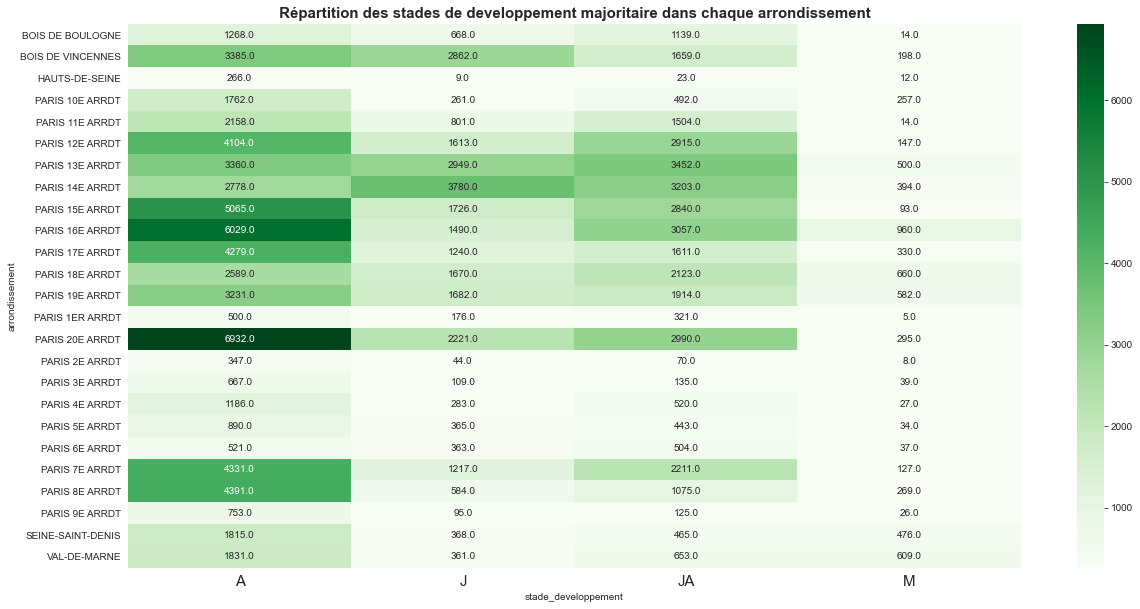

In [53]:
plt.figure(figsize=(20,10))
plt.title(" Répartition des stades de developpement majoritaire dans chaque arrondissement ",fontweight='bold',fontsize=15)
ax = sns.heatmap(df_freq_max , vmin = freq_max['count'].min() ,
                 vmax = freq_max['count'].max(),
                 cmap="Greens",
                 annot=True,
                 fmt=".1f")
plt.xticks(fontsize='15')
plt.show()


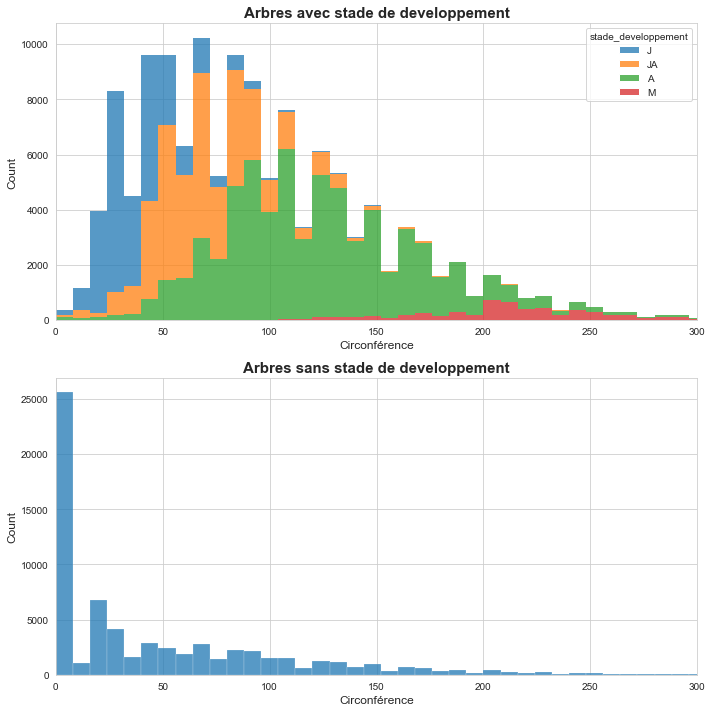

In [54]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
g=sns.histplot(data=df, x="circonference_cm",
               hue="stade_developpement",
               hue_order=['J','JA','A','M']
               ,multiple="stack",
               binwidth=8)
plt.title('Arbres avec stade de developpement',fontsize=15,fontweight='bold')
plt.xlabel('Circonférence',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlim(0,300)

plt.subplot(2,1,2)
g=sns.histplot(data=df_no_dev, x="circonference_cm",binwidth=8)
plt.title('Arbres sans stade de developpement',fontsize=15,fontweight='bold')
plt.xlabel('Circonférence',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlim(0,300)

plt.tight_layout()
plt.show()



# III) Synthèse de l'analyse
Description générale

Le jeu de données comporte 200137 arbres sur 18 variables que nous pouvons regrouper en plusieurs familles.

Variable de mensurations La hauteur moyenne des arbres est d'environ 8m. 90% des arbres ont une hauteur inférieure à 16m. Les arbres de Paris ont une circonférence moyenne d'environ 80cm.Le plus gros a une circonférence de 790cm. 90% des arbres ont un diamètre inférieur à 165cm. 584 données abérantes ont été identifié.Pour completer le jeu de données , il serait necessaire de vérifier sur place les données abérantes lors des tournées, ou d'aller questionner la source des données. les deux variables sont asymétriques et hétérogènes. Après nettoyage, nous obtenons un dataset de 199553 arbres sur 16 variables.

variable de localisation Nous avons une paire de données de géolocalisation ainsi que d'autre indications qui peuvent éventuellement servir aux services opérationnelles pour chaque arbre. D'autre part, une variable "domanialite" nous donne de précieuses informations sur le contexte de vie de l'arbre qui peuvent être utilisé pour la plannification des tournées.

variable de classification Nous avons 176 genres, 540 espèces et 437 variétés d'arbres dont 193 ont un libellé francais répertoriés. Ces informations sont précieuses pour la plannification des tournées.

stade de developpement

Cette variable s'avère etre importante pour la plannification des tournées. Celle-ci peut probablement faire l'objet d'une affectation en fonction des variables de classifications et de géométrie ou par les plus proches voisins, pour valider cette hypothèse, il est necessaire de se rapporcher d'expert métier.

Conclusion

Le jeu de données est relativement complet, il détient de précieuses informations pour la plannification des données et constitue une très bonne base de travail.

Afin d'améliorer le jeu de données, plusieurs pistes ont été identifié ce qui necessiterait l'intervention d'expert métier afin de garantir une analyse pertinente.